# 1.INTRODUCTION

Churn prediction is the practice of determining which customers are most likely to discontinue or cancel their subscription to a service. This is an important consideration for many firms because obtaining new customers is more expensive than retaining existing ones..

Every year, the banking industry has one of the highest rates of client attrition. The expanding market competitiveness, which provides customers with more options and better offers, is one of the primary drivers of client attrition for retail banking firms. In order to detect early signs of potential customer churn, banks must obtain a full, 360-degree view of their client base and their interactions across several channels. They would be able to detect early warning signs of client churn, such as a decrease in transactions or a drop in sales..

This project uses customer data to analyze and anticipate customer attrition for 'ABC Multinational Bank,' a fictitious bank. The ABC Multinational Bank dataset shows which clients have left, stayed, or signed up for their services. Each customer has multiple critical demographics that can help us identify at-risk customers, pain spots, and actions to be performed..

# ABOUT DATASET

This dataset is for ABC Multinational bank with following columns:

 -customer_id, unused variable.
 
 -credit_score, used as input.
 
 -country, used as input.
 
 -gender, used as input.
 
 -age, used as input.
 
 -tenure, used as input.
 
 -balance, used as input.
 
 -products_number, used as input.
 
 -credit_card, used as input.
 
 -active_member, used as input.
 
 -estimated_salary, used as input.
 
 -churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.
 
Aim is to Predict the Customer Churn for ABC Bank.

In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Bank Customer Churn Prediction.csv") 

In [12]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 12)

In [14]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [19]:
print(df.ndim)
print(df.shape)
print(df.size)

2
(10000, 12)
120000


In [20]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
df.describe(include="all")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [22]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf

In [12]:
url = "https://raw.githubusercontent.com/phamthuhaa/group4/main/Bank%20Customer%20Churn%20Prediction.csv?fbclid=IwAR3wV1WH5jKrdlTdP3HuQoYxvGByFp3E5kVpS-aDwJq-Vujc2GUEzyDOcbc"
df = pd.read_csv(url,encoding = 'unicode_escape')
pysqldf = lambda q: sqldf(q, globals())
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df2=pysqldf("SELECT age,SUM(credit_score) AS [sum_cre]\
             FROM df\
             GROUP BY age\
             ORDER BY sum_cre DESC")
print(df2)
df3=df2.head(100)
print(df3)

    age  sum_cre
0    38   313702
1    37   311550
2    35   304474
3    36   298749
4    34   290837
..  ...      ...
65   84      945
66   85      787
67   82      700
68   83      678
69   88      513

[70 rows x 2 columns]
    age  sum_cre
0    38   313702
1    37   311550
2    35   304474
3    36   298749
4    34   290837
..  ...      ...
65   84      945
66   85      787
67   82      700
68   83      678
69   88      513

[70 rows x 2 columns]


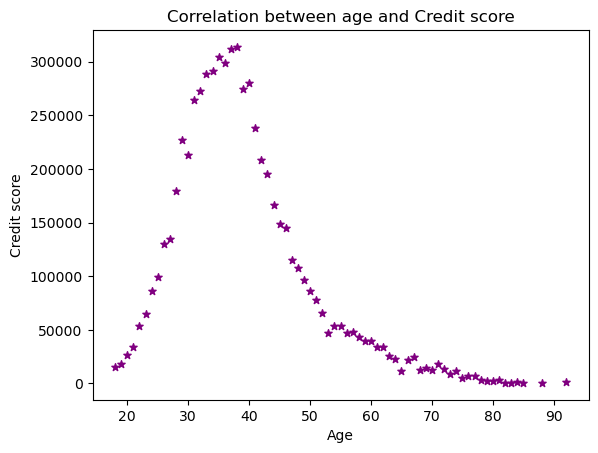

In [16]:
dfscatters=df2[['age','sum_cre']]
plt.scatter(dfscatters['age'], dfscatters['sum_cre'], color='purple', s=30, marker='*')

plt.ylabel("Credit score")
plt.xlabel("Age")
plt.title("Correlation between Age and Credit score")
plt.show()

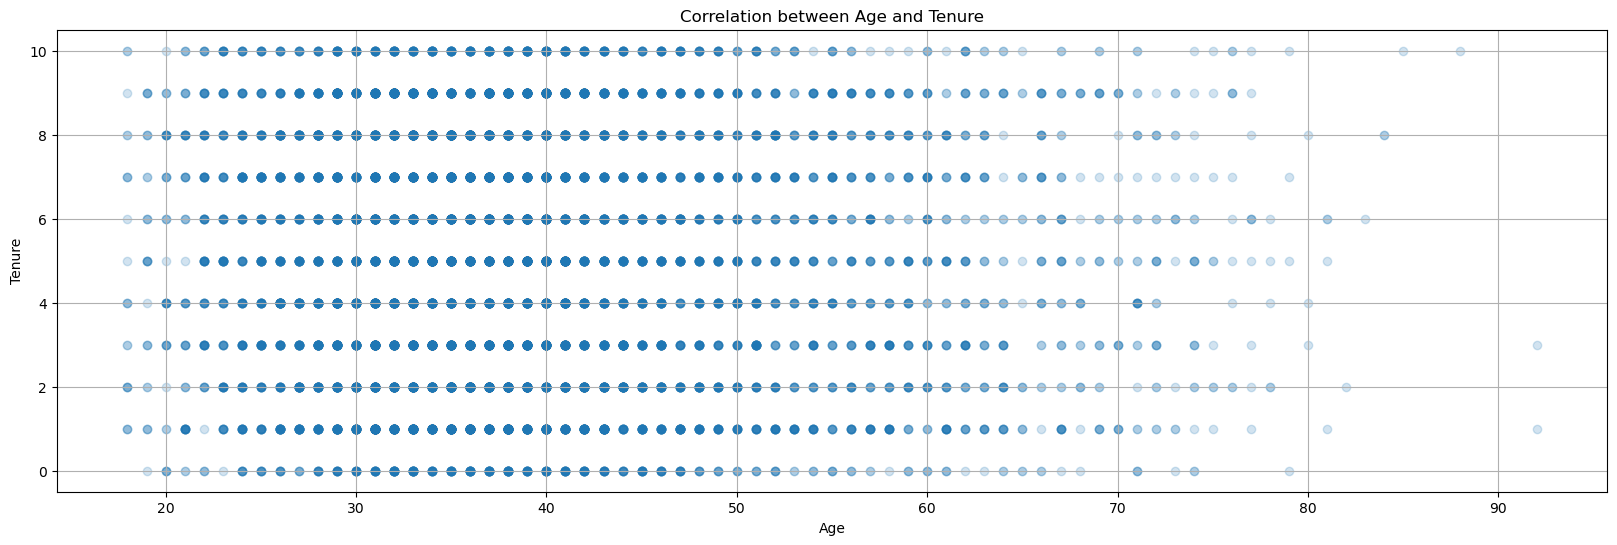

In [17]:
url = "https://raw.githubusercontent.com/phamthuhaa/group4/main/Bank%20Customer%20Churn%20Prediction.csv"
df = pd.read_csv(url)

age = df["age"]
tenure = df["tenure"]

plt.figure(figsize=(20, 6))
plt.scatter(age, tenure, alpha=0.2) 
plt.title("Correlation between Age and Tenure")
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.grid(True) 

plt.show()

In [3]:
url = "https://raw.githubusercontent.com/phamthuhaa/group4/main/Bank%20Customer%20Churn%20Prediction.csv"
df = pd.read_csv(url,encoding = 'unicode_escape')

df.head(31)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df[['age','balance']].head(31).sort_values(['age','balance'], ascending = (True,True))

,age,balance
11,24,0.00
17,24,0.00
19,24,0.00
13,25,0.00
25,25,0.00
9,27,134603.88
29,29,59697.17
7,29,115046.74
10,31,102016.72
21,32,0.00


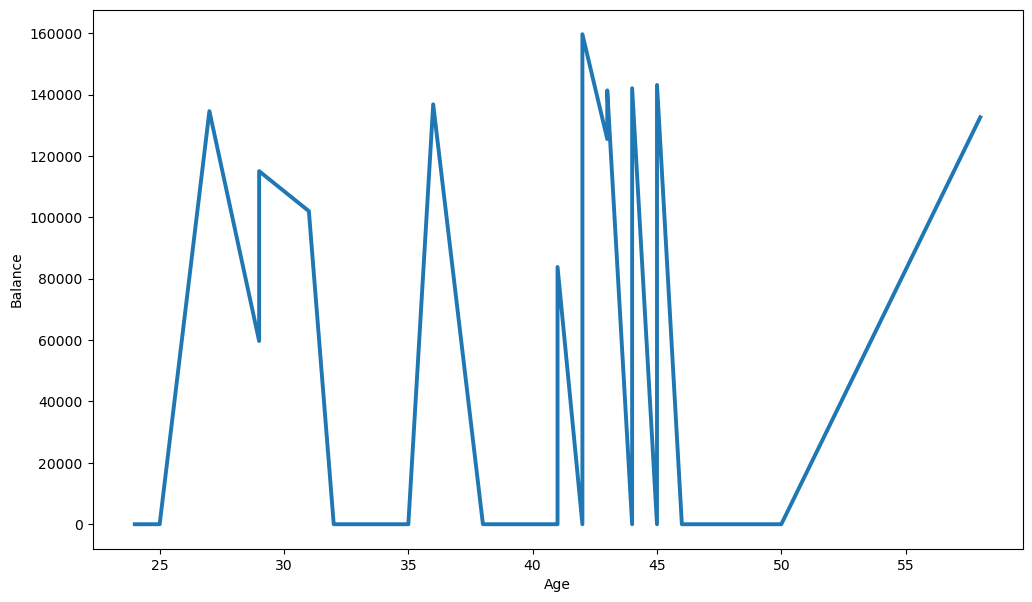

In [5]:
age = np.array([24,24,24,25,25,27,29,29,31,32,34,35,36,38,38,39,39,41,41,42,42,43,43,44,44,44,45,45,46,50,58])
balance = np.array([0.0,0.0,0.0,0.0,0.0,134603.88,59697.17,115046.74,102016.72,0.0,0.0,0.0,136815.64,0.0,0.0,0.0,0.0,0.0,83807.86,0.0,159660.8,125510.82,141349.43,0.0,113755.78,142051.07,0.0,143129.41,0.0,0.0,132602.88])

sorted_indices = np.argsort(age)
sorted_age = age[sorted_indices]
sorted_balance = balance[sorted_indices]

plt.figure(figsize=(12,7))

plt.plot(sorted_age, sorted_balance, linewidth=2.8)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [6]:
df[['age','balance']].head(31).groupby(['age']).mean('balance').sort_values(['age'],ascending=(True))

,balance
age,
24,0.000
25,0.000
27,134603.880
29,87371.955
31,102016.720
32,0.000
34,0.000
35,0.000
36,136815.640


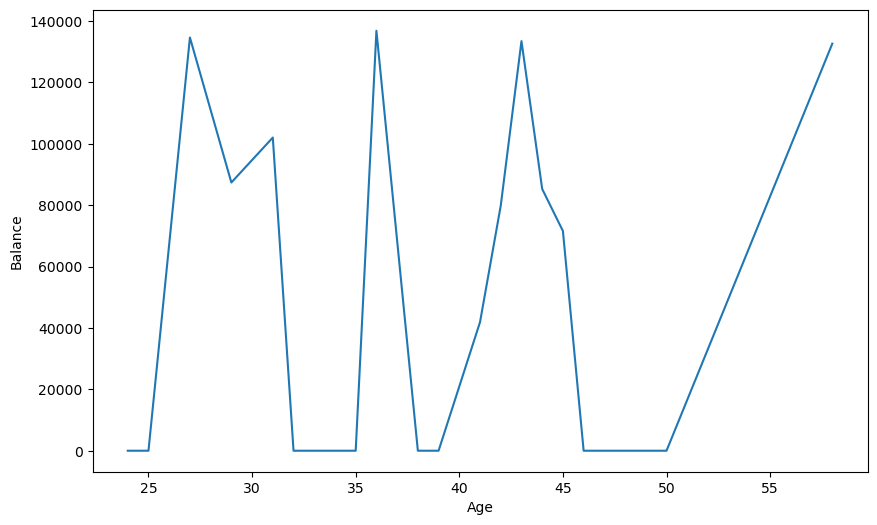

In [7]:
age = np.array([24,25,27,29,31,32,34,35,36,38,39,41,42,43,44,45,46,50,58])
balance = np.array([0,0,134603.88,87371.955,102016.72,0,0,0,136815.64,0,0,41903.93,79830.4,133430.125,85268.95,71564.705,0,0,132602.88])

sorted_indices = np.argsort(age)
sorted_age = age[sorted_indices]
sorted_balance = balance[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(sorted_age, sorted_balance)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [5]:
url = "https://raw.githubusercontent.com/phamthuhaa/group4/main/Bank%20Customer%20Churn%20Prediction.csv"
df = pd.read_csv(url, encoding='unicode_escape')

df.head(31)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
data = df[['credit_card', 'active_member']].head(31)

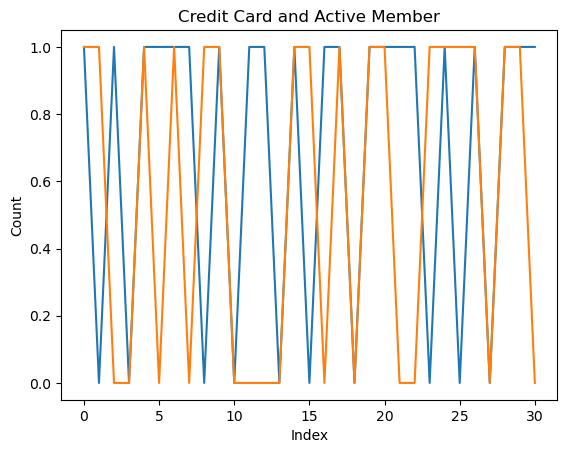

In [8]:
plt.plot(data['credit_card'], label='Credit Card')
plt.plot(data['active_member'], label='Active Member')

plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Credit Card and Active Member')

plt.show()